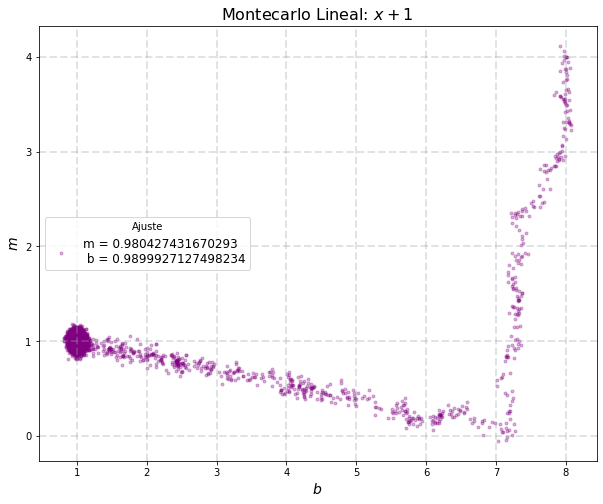

In [231]:
#model -> lambda
#theta -> theta
#sigma -> sigma
#data -> x
#theory -> y
from scipy import random
import numpy as np
import matplotlib.pyplot as plt

NMAX = 10000
theory = [1, 1]
x = np.linspace(0, 10, 1000)
y = theory[0]*x + theory[0]
sigma = [0.05, 0.05]
p0 = [4, 8]

def lnL(model, data, sigma, theory, theta):
    return -0.5 * np.sum(((theory - model(data, theta)))**2)
    
def monteCarlo(model, data, sigma, theory, p0):
    chain = []
    L0 = lnL(model, data, sigma, theory, p0)
    chain.append([p0, L0])
                   
    for i in range(0, NMAX):
        newp = []
        for index, value in enumerate(p0): newp.append(sigma[index] * np.random.randn() + value)
        newL = lnL(model, data, sigma, theory, newp)
        
        if(newL > L0):
            chain.append([newp, newL])
            p0 = newp
            L0 = newL
            continue        
        elif(newL/L0 > np.random.randn()): chain.append([newp, newL])
            
    else: return chain
            
def line(x, theta):
    return theta[0]*x + theta[1]

fit = monteCarlo(line, x, sigma, y, p0)

dots, likelihoods = [], []
xdots, ydots = [], []

for i in range(0, len(fit)):
    dots.append(fit[i][0])
    likelihoods.append(fit[i][1])

for i in range(0, len(dots)):
    xdots.append(dots[i][0])
    ydots.append(dots[i][1])

fig, ax0 = plt.subplots(figsize=(10, 8))

plt.scatter(ydots, xdots, color = 'purple', alpha = 0.3, marker = '.',  label = 'm = ' + str(xdots[-1]) + '\n b = ' + str(ydots[-1]))
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('$m$', fontsize = 14)
plt.title('Montecarlo Lineal: $x + 1$', fontsize = 16)
plt.legend(title = 'Ajuste', loc = 'center left', fontsize = 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

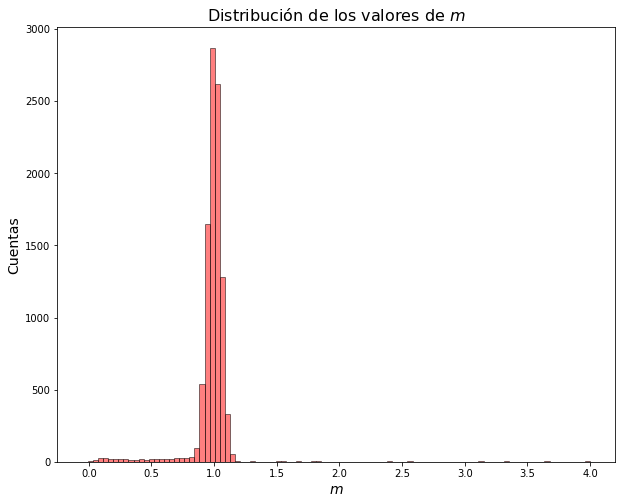

In [226]:
fig, ax0 = plt.subplots(figsize=(10, 8))
plt.hist(xdots, ec = 'black', color = 'red', alpha = 0.5, bins = 100)
plt.title('Distribución de los valores de $m$', fontsize = 16)
plt.xlabel('$m$', fontsize = 14)
plt.ylabel('Cuentas', fontsize = 14)
plt.show()

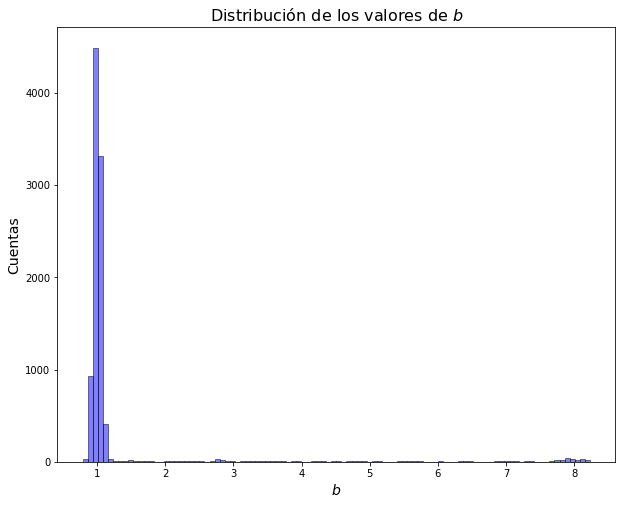

In [230]:
fig, ax0 = plt.subplots(figsize=(10, 8))
plt.hist(ydots, ec = 'black', color = 'blue', alpha = 0.5, bins = 100)
plt.title('Distribución de los valores de $b$', fontsize = 16)
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('Cuentas', fontsize = 14)
plt.show()